# Imports needed to complete this assignment

In [104]:
%%time
!pip install pandas

Wall time: 4.64 s


In [105]:
%%time
!pip install PyMySQL

In [349]:
%%time
import seaborn as sns

Wall time: 4.9 s


In [155]:
%%time
import matplotlib as plt

Wall time: 517 ms


In [156]:
%%time
import numpy as np

Wall time: 0 ns


In [157]:
%%time
import pandas as pd

Wall time: 0 ns


In [158]:
print(pd.__version__)

1.1.3


#Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.

In [281]:
alumni = pd.read_csv( "C://Users//user//Documents//jupyter assignments//Assignments//alumni.csv")
alumni

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


#Question 2 : Understand the data set (5 Marks)
Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe

#a) head

In [282]:
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


#b) tail

In [283]:
alumni.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


c) dtypes

In [284]:
alumni.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

d) info

In [285]:
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


e) describe

In [286]:
alumni.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


## Question 3 : Cleaning the data set - part A

In [287]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")

66000.0

In [288]:
alumni['Savings'] = alumni['Savings ($)'].apply(clean_currency)

In [289]:
alumni['Savings']

0      86000.0
1     116000.0
2      52000.0
3      76000.0
4      52000.0
        ...   
83     16000.0
84     72000.0
85     46000.0
86     32000.0
87     67000.0
Name: Savings, Length: 88, dtype: float64

### Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [290]:
alumni.dtypes.Savings

dtype('float64')

### Question 4 : Cleaning the data set - part B

In [347]:
alumni["Gender"]

0       Male
1       Male
2     Female
3       Male
4     Female
       ...  
83      Male
84      Male
85      Male
86    Female
87      Male
Name: Gender, Length: 88, dtype: object

In [341]:
alumni["Gender"].value_counts().astype(str)

Male      46
Female    39
M          3
Name: Gender, dtype: object

In [333]:
### b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields.
### Hint: We must use ^...$ to restrict the pattern to match the whole string.
### c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=',
###   show how this is done below
### d) You can set it directly by using the df.loc command, show how this can be done by using 
### the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'
### e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female'

In [345]:
alumni['Gender'] = alumni['Gender'].replace(['M'],'Male')

In [346]:
alumni["Gender"].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

## Question 5 : Working with the data set

In [353]:
alumni[["Savings"]].describe()

,Savings
count,88.000000
mean,47954.545455
std,28324.437721
min,6000.000000
25%,30000.000000
50%,46000.000000
75%,67000.000000
max,146000.000000


d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [355]:
paid_above_15000 = alumni[alumni["Fee"] >15000]
paid_above_15000.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000",72000.0


## Question 6 : Visualise the data set

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

Standard Diploma        65
College Prep Diploma    23
Name: Diploma Type, dtype: int64

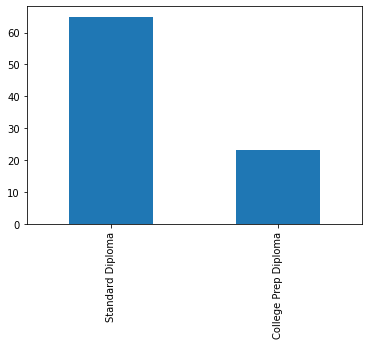

In [365]:
alumni["Diploma Type"].value_counts().plot(kind='bar')
alumni["Diploma Type"].value_counts()

b) Now create a box plot comparison between 'Savings' and 'Salary' columns

<AxesSubplot:>

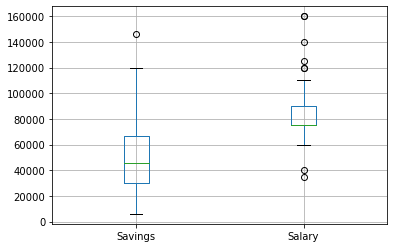

In [366]:
alumni.boxplot(column=['Savings', 'Salary'])

c) Generate a histogram with the 'Salary' column and use 12 bins.

<AxesSubplot:ylabel='Frequency'>

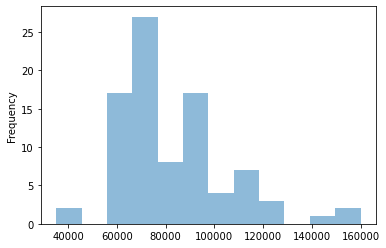

In [371]:
alumni['Salary'].plot.hist(bins=12, alpha=0.5)

d) Generate a scatter plot comparing 'Salary' and 'Savings' columns

<AxesSubplot:xlabel='Salary', ylabel='Savings'>

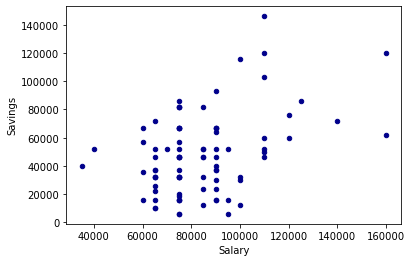

In [372]:
alumni.plot.scatter(x='Salary',y='Savings',c='DarkBlue')

## Question 7 : Contingency Table

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [399]:
alumni['Marital Status']

0       Single
1      Married
2       Single
3      Married
4     Divorced
        ...   
83      Single
84      Single
85     Married
86    Divorced
87     Married
Name: Marital Status, Length: 88, dtype: object

In [403]:
alumni['Defaulted'].astype(str)

0     Yes
1      No
2     Yes
3      No
4     Yes
     ... 
83     No
84    Yes
85     No
86    Yes
87    Yes
Name: Defaulted, Length: 88, dtype: object

In [410]:
alumni.set_index(['Defaulted', 'Marital Status'])

,,Year Graduated,Gender,Diploma Type,Salary,Fee,Savings ($),Savings
Defaulted,Marital Status,,,,,,,
Yes,Single,2004,Male,Standard Diploma,125000,10869,"$86,000",86000.0
No,Married,2005,Male,College Prep Diploma,100000,10869,"$116,000",116000.0
Yes,Single,2006,Female,Standard Diploma,70000,10869,"$52,000",52000.0
No,Married,2007,Male,Standard Diploma,120000,10869,"$76,000",76000.0
Yes,Divorced,2006,Female,Standard Diploma,95000,11948,"$52,000",52000.0
...,...,...,...,...,...,...,...,...
No,Single,2007,Male,Standard Diploma,75000,12066,"$16,000",16000.0
Yes,Single,2008,Male,College Prep Diploma,65000,12066,"$72,000",72000.0
No,Married,2009,Male,Standard Diploma,75000,12066,"$46,000",46000.0


In [421]:
pd.crosstab(index, ['Marital Status', 'Defaulted'], values=None, 
            rownames=None, colnames=None, aggfunc=None, margins=False, 
            margins_name='All', dropna=True, normalize=False)

ValueError: Shape of passed values is (9, 3), indices imply (88, 3)